In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv("E:/deeplearning/data/diabetes.csv")
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A1CEF678D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001A1CF567240>]], dtype=object)

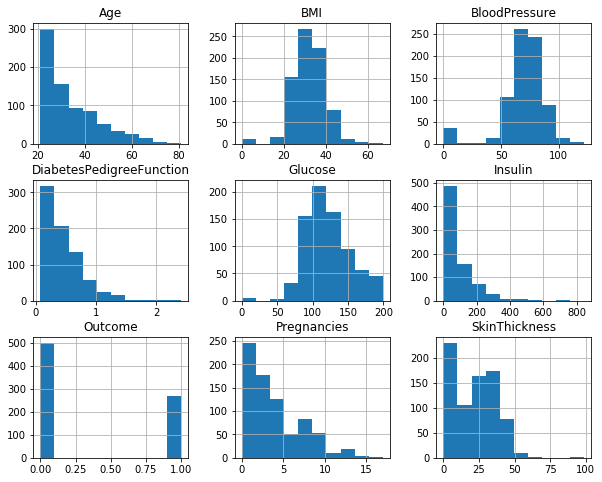

In [7]:
df.hist(figsize=(10,8))

Pregnancies                    Axes(0.125,0.657941;0.227941x0.222059)
Glucose                     Axes(0.398529,0.657941;0.227941x0.222059)
BloodPressure               Axes(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  Axes(0.125,0.391471;0.227941x0.222059)
Insulin                     Axes(0.398529,0.391471;0.227941x0.222059)
BMI                         Axes(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          Axes(0.125,0.125;0.227941x0.222059)
Age                            Axes(0.398529,0.125;0.227941x0.222059)
Outcome                        Axes(0.672059,0.125;0.227941x0.222059)
dtype: object

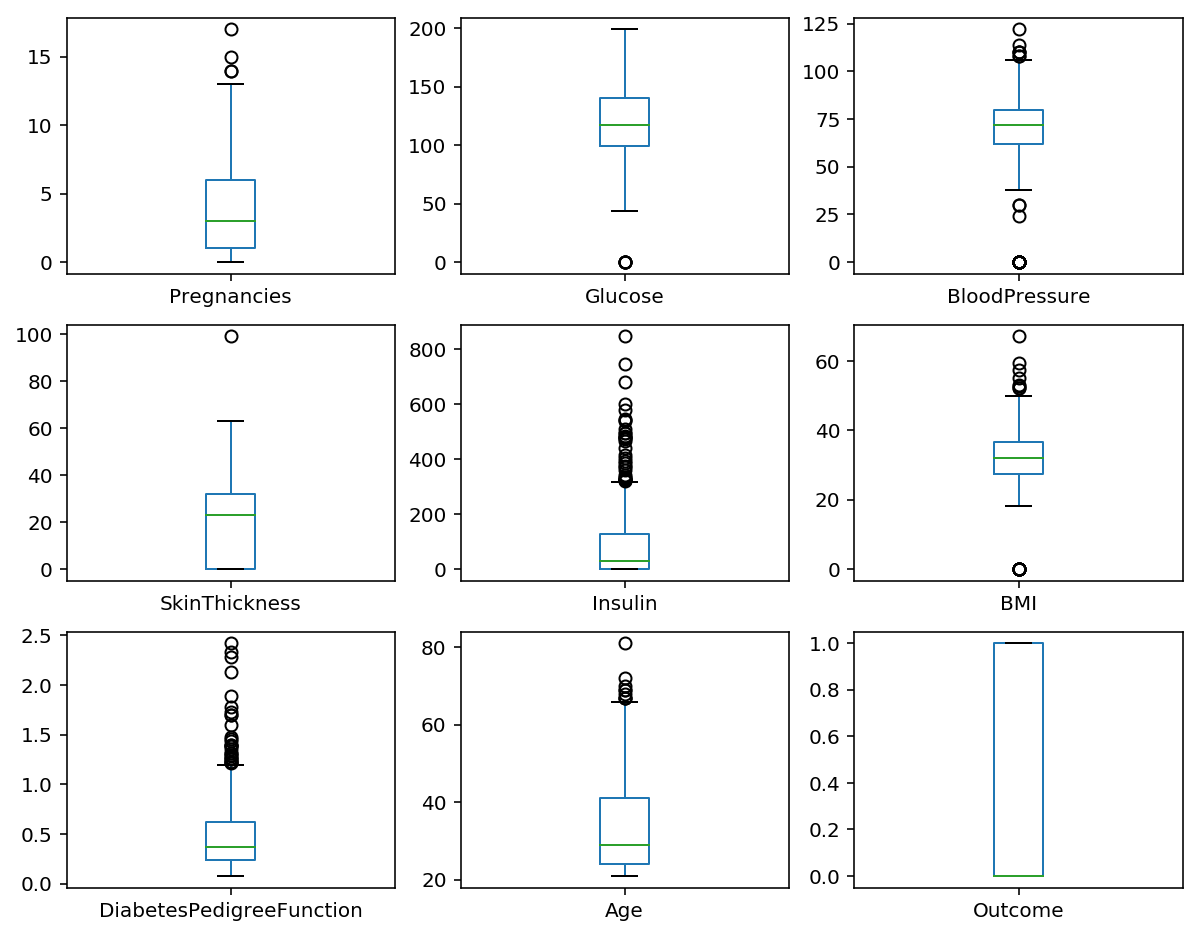

In [47]:
df.plot(kind='box' ,subplots=True ,layout=(3,3), sharex=False ,sharey=False ,figsize=(10,8))

In [16]:
column_X = df.columns[0:len(df.columns)-1]

In [17]:
column_X

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [18]:
corr = df[df.columns].corr()

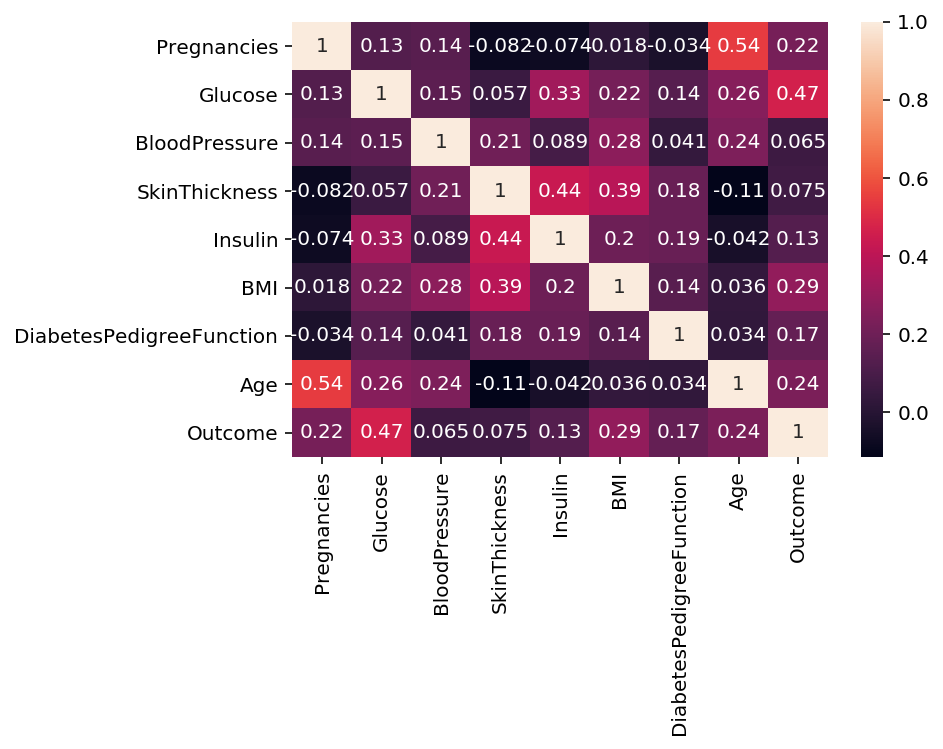

In [20]:
sns.heatmap(corr,annot=True)

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [24]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
select_top4_feature = SelectKBest(score_func=chi2,k=4)

In [26]:
fit =select_top4_feature.fit(X,y)
features = fit.transform(X)

In [27]:
features[0:5]

array([[ 148. ,    0. ,   33.6,   50. ],
       [  85. ,    0. ,   26.6,   31. ],
       [ 183. ,    0. ,   23.3,   32. ],
       [  89. ,   94. ,   28.1,   21. ],
       [ 137. ,  168. ,   43.1,   33. ]])

In [28]:
X_features = pd.DataFrame(data = features,columns = ["Glucose","Insulin","BMI","Age"])

In [29]:
X_features.head()

,Glucose,Insulin,BMI,Age
0,148.0,0.0,33.6,50.0
1,85.0,0.0,26.6,31.0
2,183.0,0.0,23.3,32.0
3,89.0,94.0,28.1,21.0
4,137.0,168.0,43.1,33.0


In [31]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X_rescaled = scl.fit_transform(X_features)

In [32]:
X = pd.DataFrame(data = X_rescaled,columns = ["Glucose","Insulin","BMI","Age"])

In [33]:
X.head()

,Glucose,Insulin,BMI,Age
0,0.848324,-0.692891,0.204013,1.425995
1,-1.123396,-0.692891,-0.684422,-0.190672
2,1.943724,-0.692891,-1.103255,-0.105584
3,-0.998208,0.123302,-0.494043,-1.041549
4,0.504055,0.765836,1.409746,-0.020496


In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_rescaled,y,test_size=0.2,random_state=22)

In [37]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [38]:
models =[]
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC()))

In [39]:
results = []
names = []
for name,model in models:
    kfold= KFold(n_splits=10,random_state=22)
    cv_result = cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
    names.append(name)
    results.append(cv_result)
    

In [41]:
for i in range(len(names)):
    print (names[i],np.mean(results[i]))

LR 0.776890534109
NB 0.760497091486
KNN 0.745928080381
DT 0.697117927023
SVM 0.776890534109


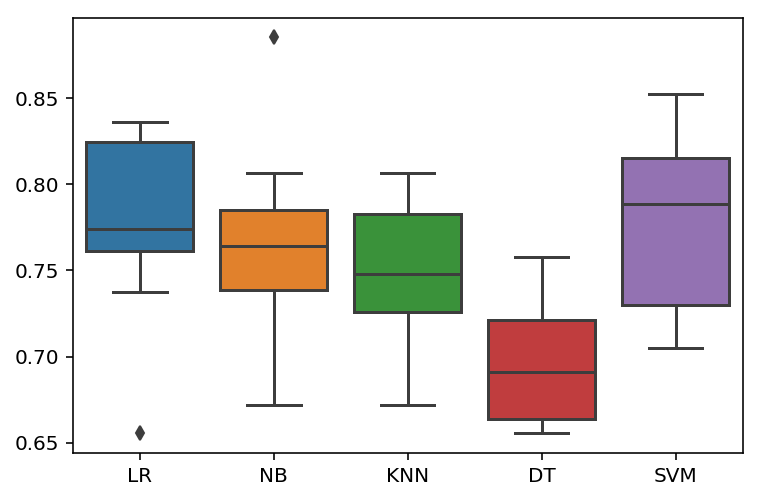

In [44]:
ax = sns.boxplot(data = results)
ax.set_xticklabels(names)

In [51]:
lr =LogisticRegression()
lr.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
y_lr_pred = lr.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [55]:
print (accuracy_score(y_test,y_lr_pred))

0.714285714286


In [56]:
svm = SVC()
svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [57]:
y_svm_pred = svm.predict(X_test)

In [58]:
print (accuracy_score(y_test,y_svm_pred))

0.733766233766


In [59]:
print (classification_report(y_test,y_svm_pred))

             precision    recall  f1-score   support

          0       0.74      0.92      0.82       100
          1       0.72      0.39      0.51        54

avg / total       0.73      0.73      0.71       154



In [60]:
print (confusion_matrix(y_test,y_svm_pred))

[[92  8]
 [33 21]]


In [61]:
conf_matrix = confusion_matrix(y_test,y_svm_pred)

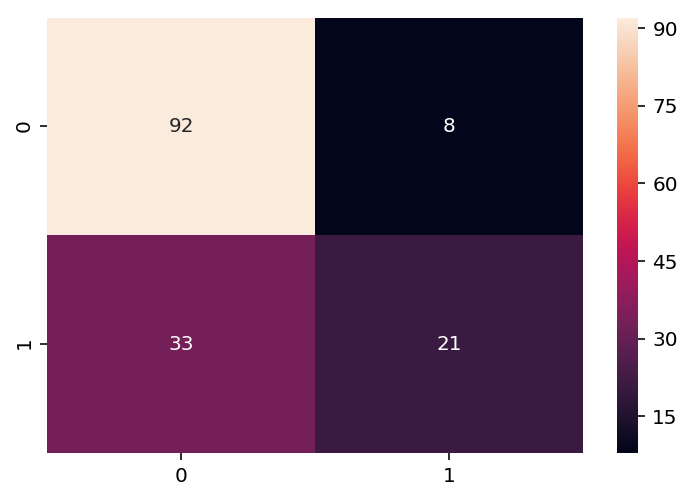

In [63]:
label=["0","1"]
sns.heatmap(conf_matrix,annot=True,xticklabels=label,yticklabels=label)